In [1]:
import pandas as pd

In [2]:
DATASET = './outputs/PS_20250407120904_263822712/PS_20250407120904_263822712_rawLog.csv'

df = pd.read_csv(DATASET)
# df = df.iloc[:500000]
df

,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,isUnauthorizedOverdraft
0,0,TRANSFER,53.00,C1338812845,53.00,0.0,CC6184384921,0.00,53.00,1,0,0
1,0,CASH_OUT,53.00,CC6184384921,53.00,0.0,M0841523677,0.00,0.00,1,0,0
2,0,TRANSFER,60.30,C6007389793,60.30,0.0,CC0844900933,0.00,60.30,1,0,0
3,0,CASH_OUT,60.30,CC0844900933,60.30,0.0,M2489712136,0.00,0.00,1,0,0
4,0,TRANSFER,39250.82,C2309471849,39250.82,0.0,CC3001172410,0.00,39250.82,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
111526305,364,CASH_OUT,2410406.59,CC2386878167,2410406.59,0.0,M1562116271,698155.47,698155.47,1,0,0
111526306,364,TRANSFER,1823358.00,C4936659188,1823358.00,0.0,CC4250081293,0.00,1823358.00,1,0,0
111526307,364,CASH_OUT,1823358.00,CC4250081293,1823358.00,0.0,M7581070827,758379.12,758379.12,1,0,0
111526308,364,TRANSFER,690885.97,CC0819249649,690885.97,0.0,CC5021487295,0.00,690885.97,1,0,0


In [3]:
balances = {}
fraud = 0

for _, row in df.iterrows():
    is_fraud = row['isFraud']
    # Track origin account
    # if row['nameOrig'] not in balances:
    #     balances[row['nameOrig']] = {}
    # balances[row['nameOrig']][row['step']] = row['newBalanceOrig']

    # # Track destination account
    # if row['nameDest'] not in balances:
    #     balances[row['nameDest']] = {}
    # balances[row['nameDest']][row['step']] = row['newBalanceDest']

    if is_fraud:
        fraud += 1


In [4]:
print(f"Number of users: {len(balances)}")
print(f"Total fraudolent transactions: {fraud} out of {len(df)} transactions")
fraud_perc = fraud / len(df)
print(f"Anomaly percentage: {round(fraud_perc * 100, 2)}")

Number of users: 0
Total fraudolent transactions: 143548 out of 111526310 transactions
Anomaly percentage: 0.13


In [5]:
# Create DataFrame
balance_df = pd.DataFrame.from_dict(balances, orient='index').T

# Identify the full range of steps (days)
full_range = range(balance_df.index.min(), balance_df.index.max() + 1)

# Reindex to include all steps, then forward fill
balance_df = balance_df.reindex(full_range).fillna(method='ffill').fillna(method='bfill')

TypeError: 'float' object cannot be interpreted as an integer

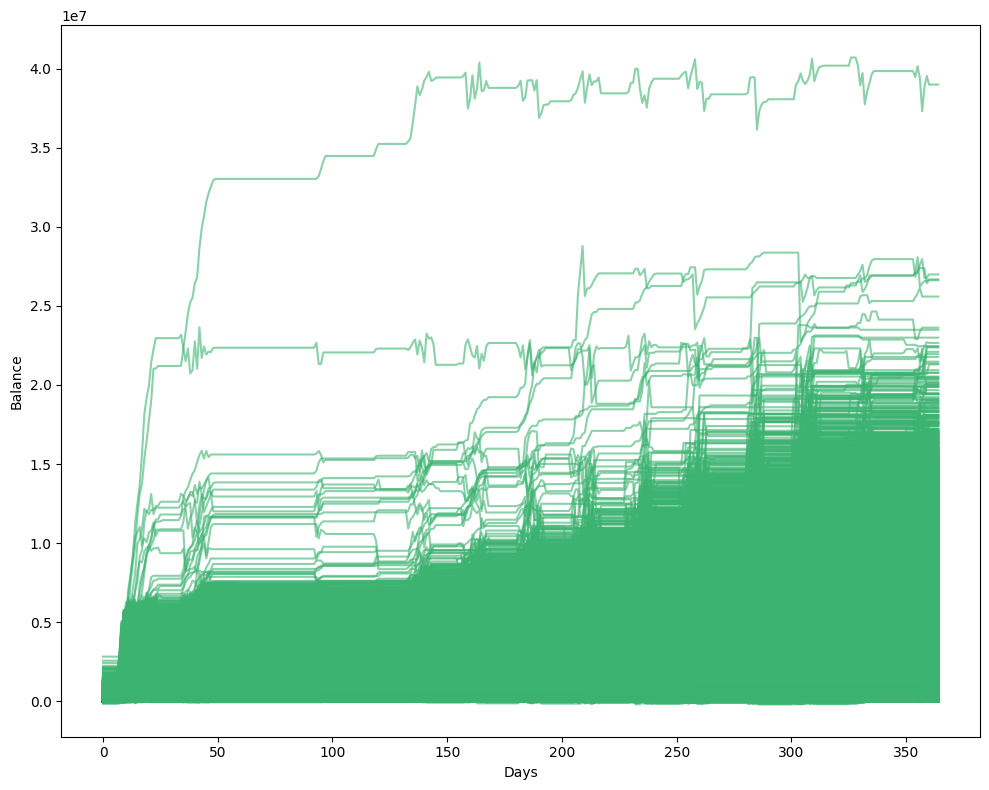

In [12]:
import matplotlib.pyplot as plt

# Plot the balance evolution for all users (columns) as separate lines
# plt.figure(figsize=(15,10), dpi= 300)
plt.figure(figsize=(10,8))

# Plot each column (account balance) as a line
for user in balance_df.columns:
    color = 'mediumseagreen' if user.startswith('C') else 'hotpink'

    plt.plot(balance_df.index, balance_df[user], color=color, label=f"User {user}", alpha=0.6)

# Add title and labels
plt.xlabel("Days")
plt.ylabel("Balance")

# Rotate x-axis labels for better visibility
plt.tick_params(axis='x')
plt.tick_params(axis='y')

# Display the plot
plt.tight_layout()
plt.show()